<a href="https://colab.research.google.com/github/aniilkeles/Machine-Learning-Projects/blob/main/DecisionTree/33_DecisionTreeRegressorProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [152]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/tips.csv')

In [153]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [155]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [156]:
df['time'].unique() # time,smoker,sex one-hot-encoding

array(['Dinner', 'Lunch'], dtype=object)

In [157]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [158]:
df['tip'].value_counts()

,count
tip,
2.00,33
3.00,23
4.00,12
2.50,10
5.00,10
...,...
1.47,1
1.17,1
4.67,1


In [159]:
# one-hot-encoding
cols = ['sex','smoker','time']

In [160]:
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [161]:
df.head()

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
0,16.99,1.01,Sun,2,False,False,False
1,10.34,1.66,Sun,3,True,False,False
2,21.01,3.50,Sun,3,True,False,False
3,23.68,3.31,Sun,2,True,False,False
4,24.59,3.61,Sun,4,False,False,False


In [162]:
# ordinal encoding

In [163]:
ord_day_order = ['Sun','Sat','Thur','Fri']

In [164]:
from sklearn.preprocessing import OrdinalEncoder

In [165]:
ordinal_encoder = OrdinalEncoder(categories=[ord_day_order])

In [166]:
df['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [167]:
df["day"]= ordinal_encoder.fit_transform(df[["day"]])

In [168]:
df['day'].unique()

array([0., 1., 2., 3.])

In [169]:
df['day'].value_counts()

,count
day,
1.0,87
0.0,76
2.0,62
3.0,19


In [170]:
df.head()

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
0,16.99,1.01,0.0,2,False,False,False
1,10.34,1.66,0.0,3,True,False,False
2,21.01,3.50,0.0,3,True,False,False
3,23.68,3.31,0.0,2,True,False,False
4,24.59,3.61,0.0,4,False,False,False


In [171]:
df.head()

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
0,16.99,1.01,0.0,2,False,False,False
1,10.34,1.66,0.0,3,True,False,False
2,21.01,3.50,0.0,3,True,False,False
3,23.68,3.31,0.0,2,True,False,False
4,24.59,3.61,0.0,4,False,False,False


In [172]:
df['smoker_Yes'].value_counts()

,count
smoker_Yes,
False,151
True,93


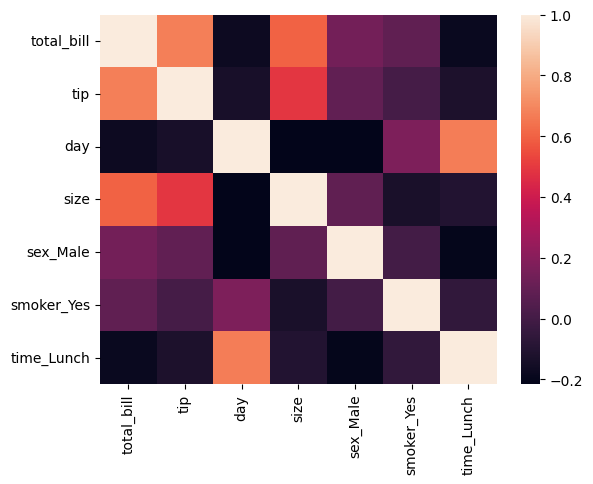

In [173]:
sns.heatmap(df.corr())
plt.show()

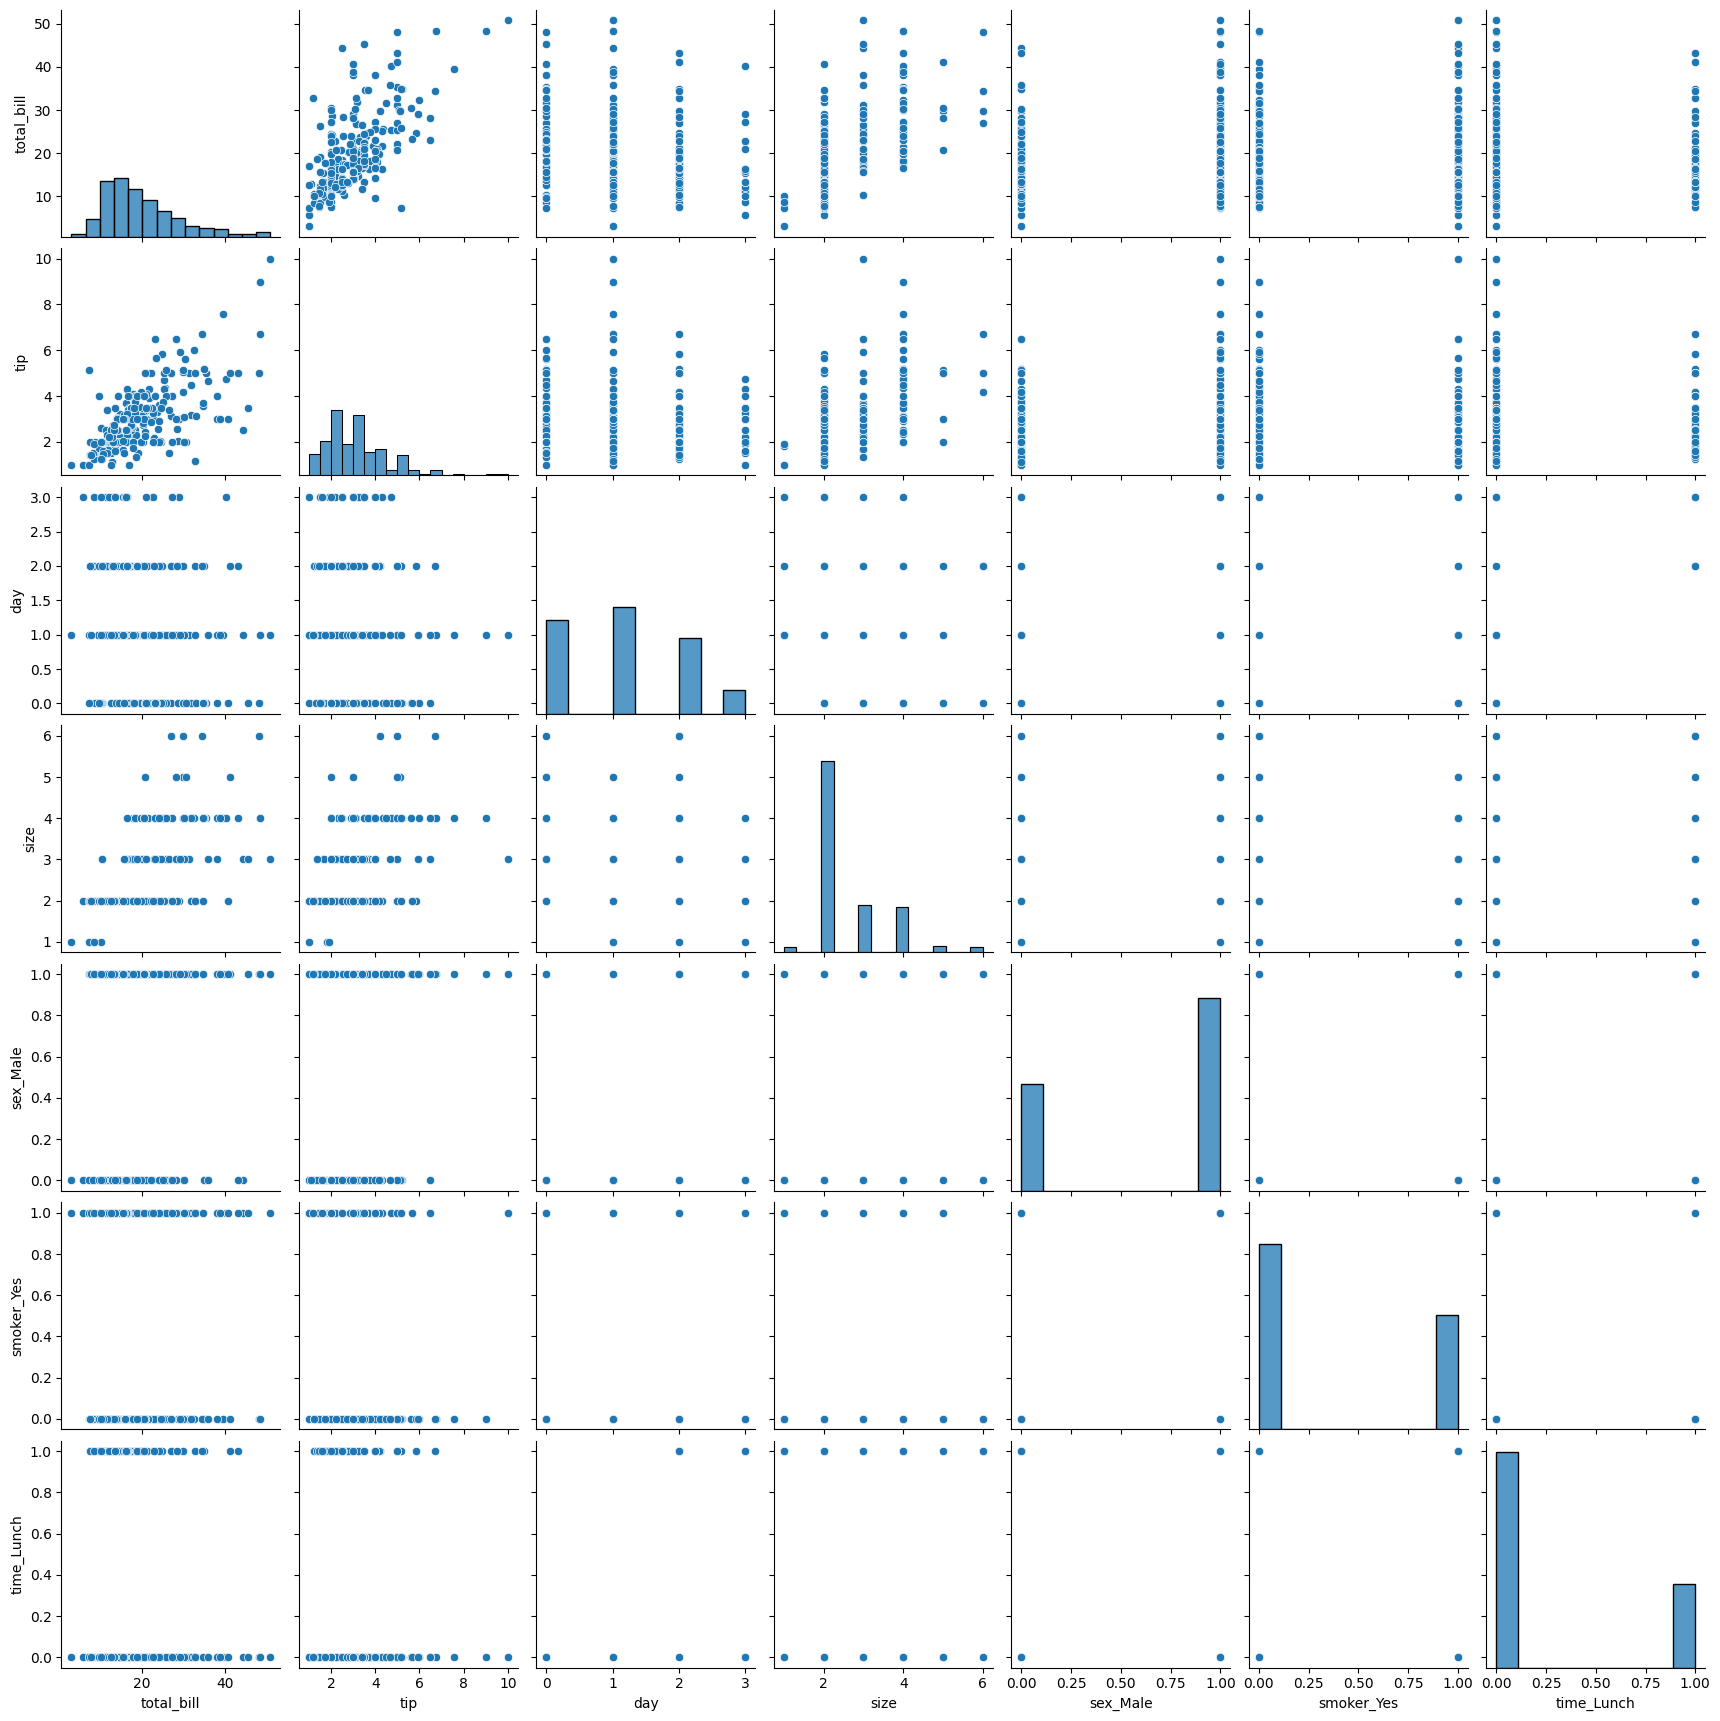

In [174]:
sns.pairplot(df)
plt.show()

In [175]:
X = df.drop('tip',axis=1)
y = df['tip']

In [176]:
# train-test-split

In [177]:
from sklearn.model_selection import train_test_split

In [178]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=15)

In [179]:
# DecisionTreeRegressor

In [180]:
from sklearn.tree import DecisionTreeRegressor

In [181]:
tree_model = DecisionTreeRegressor(criterion="squared_error",max_depth=None,random_state=None)

In [182]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [183]:
y_pred = tree_model.predict(X_test)

In [184]:
# evaluate success of model

In [185]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [186]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  1.005135135135135
mse :  1.7657999999999998
r2_score :  0.056036388545032456


[Text(0.6454290334855404, 0.96875, 'total_bill <= 20.49\nsquared_error = 1.9\nsamples = 170\nvalue = 3.08'),
 Text(0.3769501522070015, 0.90625, 'total_bill <= 16.28\nsquared_error = 0.665\nsamples = 102\nvalue = 2.432'),
 Text(0.511189592846271, 0.9375, 'True  '),
 Text(0.18807077625570776, 0.84375, 'total_bill <= 13.145\nsquared_error = 0.518\nsamples = 64\nvalue = 2.127'),
 Text(0.07210806697108067, 0.78125, 'day <= 0.5\nsquared_error = 0.573\nsamples = 41\nvalue = 1.959'),
 Text(0.0289193302891933, 0.71875, 'total_bill <= 9.77\nsquared_error = 1.242\nsamples = 10\nvalue = 2.535'),
 Text(0.0121765601217656, 0.65625, 'sex_Male <= 0.5\nsquared_error = 0.331\nsamples = 2\nvalue = 4.575'),
 Text(0.0060882800608828, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.0182648401826484, 0.59375, 'squared_error = 0.0\nsamples = 1\nvalue = 5.15'),
 Text(0.045662100456621, 0.65625, 'total_bill <= 11.44\nsquared_error = 0.17\nsamples = 8\nvalue = 2.025'),
 Text(0.030441400304414,

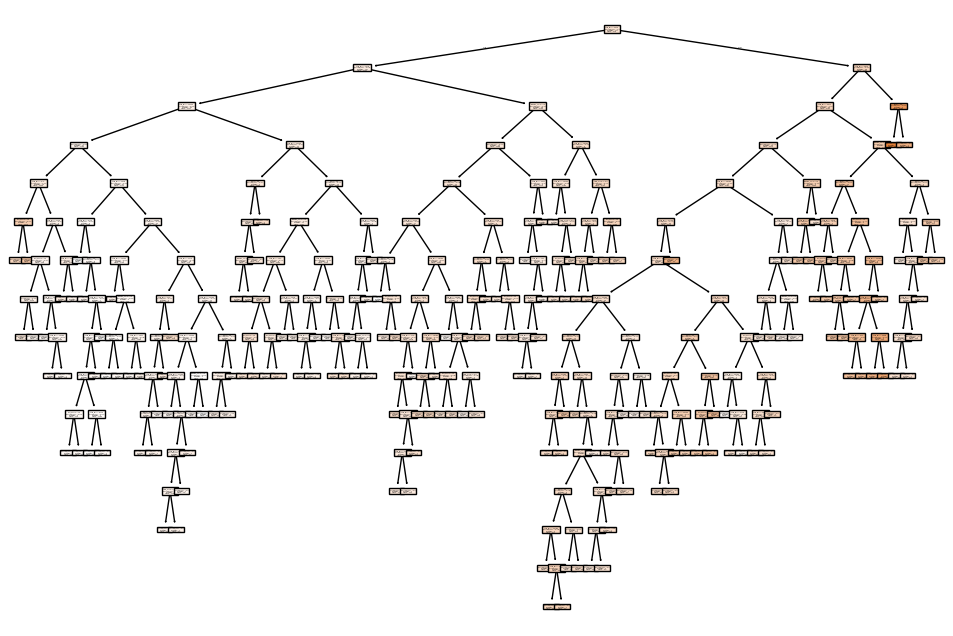

In [187]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(tree_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)

In [188]:
# hyperparameter-tuning

In [189]:
params = {
    "criterion" : ["squared_error","friedman_mse", "absolute_error", "poisson"],
    "max_depth" : [1,2,3,4,5,16,None],
    "max_features" : ["sqrt","log2","None"],
    "splitter"  : ["best","random"]
}

In [190]:
from sklearn.model_selection import GridSearchCV

In [191]:
grid = GridSearchCV(estimator=DecisionTreeRegressor(),param_grid=params,verbose=3,cv=5,n_jobs=-1,scoring='r2')

In [192]:
import warnings
warnings.filterwarnings("ignore")
grid.fit(X_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 16, None],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'splitter': ['best', 'random']},
             scoring='r2', verbose=3)

In [193]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [194]:
grid.best_estimator_

DecisionTreeRegressor(max_depth=3, max_features='log2')

In [195]:
# best_model = grid.best_estimator_
# y_pred = best_model.predict(X_test)
# mae = mean_absolute_error(y_test,y_pred)
# mse = mean_squared_error(y_test,y_pred)
# score = r2_score(y_test,y_pred)
# print("mae : ",mae)
# print("mse : ",mse)
# print("r2_score : ",score)

tree_new_model = DecisionTreeRegressor(criterion='poisson',max_depth=3,max_features=None,splitter='best',random_state=42)
tree_new_model.fit(X_train,y_train)
y_pred = tree_new_model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)


mae :  0.7859796701630504
mse :  1.1292124298235273
r2_score :  0.39634418203870436


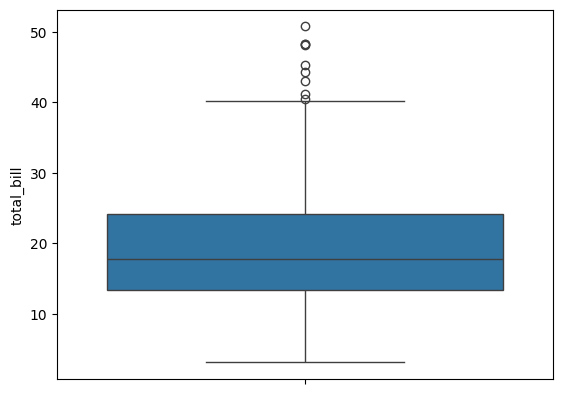

In [196]:
sns.boxplot(df['total_bill'])
plt.show()

[Text(0.5, 0.875, 'total_bill <= 17.87\npoisson = 0.282\nsamples = 170\nvalue = 3.08'),
 Text(0.25, 0.625, 'total_bill <= 13.145\npoisson = 0.123\nsamples = 83\nvalue = 2.281'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'day <= 0.5\npoisson = 0.123\nsamples = 41\nvalue = 1.959'),
 Text(0.0625, 0.125, 'poisson = 0.217\nsamples = 10\nvalue = 2.535'),
 Text(0.1875, 0.125, 'poisson = 0.058\nsamples = 31\nvalue = 1.774'),
 Text(0.375, 0.375, 'total_bill <= 16.28\npoisson = 0.08\nsamples = 42\nvalue = 2.596'),
 Text(0.3125, 0.125, 'poisson = 0.058\nsamples = 23\nvalue = 2.426'),
 Text(0.4375, 0.125, 'poisson = 0.092\nsamples = 19\nvalue = 2.802'),
 Text(0.75, 0.625, 'total_bill <= 30.27\npoisson = 0.238\nsamples = 87\nvalue = 3.842'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'size <= 4.5\npoisson = 0.151\nsamples = 64\nvalue = 3.43'),
 Text(0.5625, 0.125, 'poisson = 0.143\nsamples = 60\nvalue = 3.357'),
 Text(0.6875, 0.125, 'poisson = 0.095\nsamples = 4\nvalue = 4.535'),
 T

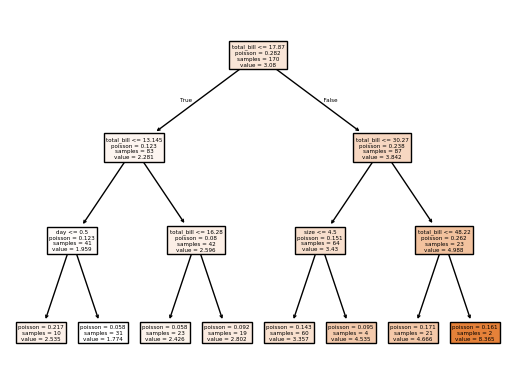

In [197]:
tree.plot_tree(tree_new_model.fit(X_train,y_train),feature_names=X_train.columns,filled=True)

In [198]:
# linear regression

In [199]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [200]:
scaler = StandardScaler()

In [201]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [202]:
linear = LinearRegression()

In [203]:
linear.fit(X_train_scaled,y_train)

LinearRegression()

In [204]:
y_pred = linear.predict(X_test_scaled)

In [205]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  0.7959979409076446
mse :  1.1452060494453995
r2_score :  0.3877942925050655


In [206]:
# KNN

In [207]:
from sklearn.neighbors import KNeighborsRegressor

In [208]:
regressor = KNeighborsRegressor(n_neighbors=5,algorithm="auto")

In [209]:
regressor.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [210]:
y_pred = regressor.predict(X_test_scaled)

In [211]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)

mae :  0.8219729729729731
mse :  1.1473590810810812
r2_score :  0.3866433221129514


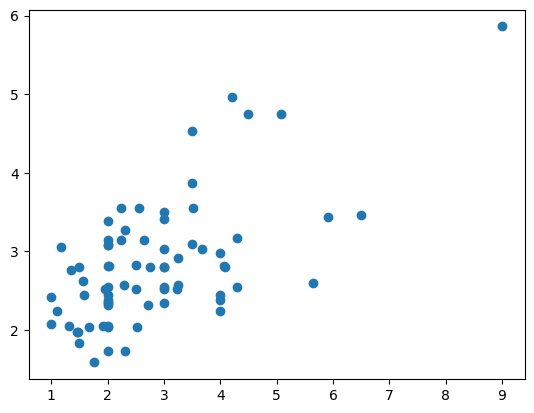

In [212]:
plt.scatter(y_test,y_pred)
plt.show()

mae :  0.8271428571428571
mse :  1.1736636514065084
r2_score :  0.3725813914287508


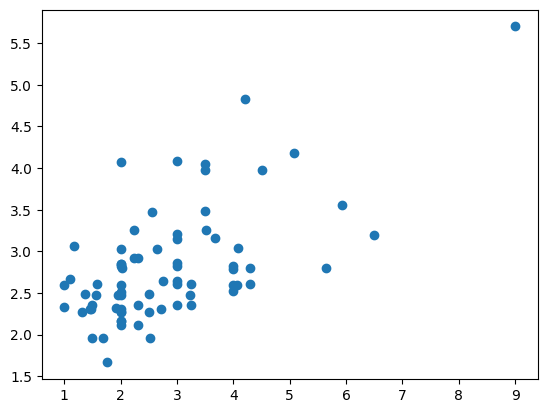

In [213]:
regressor = KNeighborsRegressor(n_neighbors=7,algorithm="auto")
regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("r2_score : ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [214]:
# hyperparameter-tuning KNN

In [215]:
knn_params={
    'n_neighbors' : [3,5,7,9,11,15],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean', 'manhattan']
}

In [216]:
knn_grid = GridSearchCV(estimator=KNeighborsRegressor(),param_grid=knn_params,cv=5,scoring='r2',verbose=1)

In [217]:
knn_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [218]:
# best_knn = knn_grid.best_estimator_
# y_pred_knn = best_knn.predict(X_test_scaled)
# knn_mae = mean_absolute_error(y_test,y_pred_knn)
# knn_mse = mean_squared_error(y_test,y_pred_knn)
# knn_r2_score = r2_score(y_test,y_pred_knn)
# print("mae : ",knn_mae)
# print("mse : ",knn_mse)
# print("r2_score : ",knn_r2_score)
# plt.scatter(y_test,y_pred)
# plt.show()
knn_grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}

In [219]:
knn_grid_new = KNeighborsRegressor(n_neighbors=11,metric='euclidean',weights='uniform',algorithm='auto')

In [220]:
knn_grid_new.fit(X_train_scaled,y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=11)

In [221]:
y_pred = knn_grid_new.predict(X_test_scaled)

In [222]:
 knn_mae = mean_absolute_error(y_test,y_pred)
 knn_mse = mean_squared_error(y_test,y_pred)
 knn_r2_score = r2_score(y_test,y_pred)
 print("mae : ",knn_mae)
 print("mse : ",knn_mse)
 print("r2_score : ",knn_r2_score)

mae :  0.8487100737100737
mse :  1.2575846213982578
r2_score :  0.3277188124785777


In [223]:
# SVR

In [224]:
from sklearn.svm import SVR

In [225]:
svr = SVR()

In [226]:
svr.fit(X_train_scaled,y_train)

SVR()

In [227]:
y_pred = svr.predict(X_test_scaled)

mae :  0.7230842742215503
mse :  1.0099675225990645
score :  0.46009027631394295


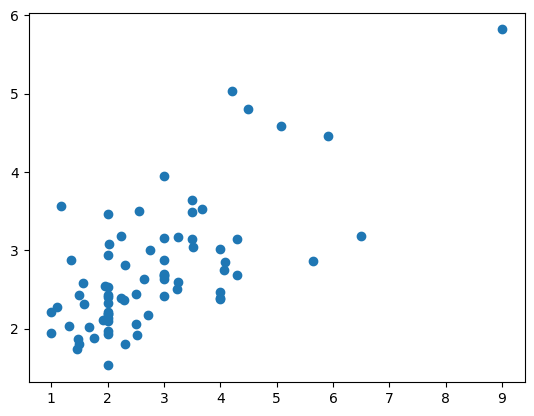

In [228]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("score : ",score)
plt.scatter(y_test,y_pred)
plt.show()

In [229]:
# SVR Hyperparameter-tuning

In [230]:
param_grid = {
     "C" : [0.1,1,10,100,1000],
    "gamma" : ["scale","auto"],
    "kernel" : ["rbf","linear"]
}

In [231]:
grid = GridSearchCV(estimator =SVR(),param_grid = param_grid,n_jobs=-1,verbose = 3)

In [232]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [233]:
grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [234]:
svr_new = SVR(C=0.1, gamma= 'scale', kernel= 'linear')

In [235]:
svr_new.fit(X_train_scaled,y_train)

SVR(C=0.1, kernel='linear')

In [236]:
y_pred = svr_new.predict(X_test_scaled)

mae :  0.7882385464067542
mse :  1.1492973039109196
score :  0.3856071844856671


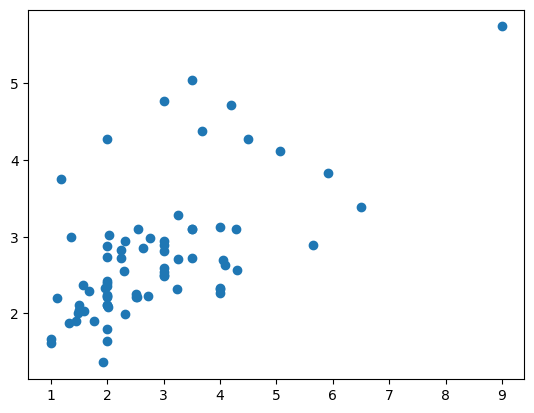

In [237]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mae : ",mae)
print("mse : ",mse)
print("score : ",score)
plt.scatter(y_test,y_pred)
plt.show()